In [2]:
import pandas as pd
import numpy as np
import wbgapi as wb
import yfinance as yf

import tensorflow as tf
import tensorflow.keras.datasets as tfds

import xgboost
import lightgbm

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
import requests
import json
import scipy.io as sio
import itertools
import io


from urllib.request import urlopen
from zipfile import ZipFile

from statsmodels.formula.api import ols
from statsmodels.api import add_constant


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error



from xgboost import XGBRegressor
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

## Q1

In [4]:
(x_train, y_train), (x_test, y_test) = tfds.mnist.load_data() 
mnist = {'x_train': x_train, 'x_test': x_test,
         'y_train': y_train, 'y_test': y_test}

In [56]:
mnist['x_train'].shape

(60000, 28, 28)

In [57]:
mnist['y_train'].shape

(60000,)

In [5]:
x_train= x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0],-1).astype('float32') / 255.0

In [6]:
def experiment(X, y, strategy, model,test=0.20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    res = strategy(model).fit(X_train, y_train)
    y_pred = res.predict(X_test)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return report, accuracy, precision, recall

## Regular Classification Algorithms 

### Logistic Regression

In [8]:
print("Logistic Regression (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LogisticRegression(max_iter=1000))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Logistic Regression (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, LogisticRegression(max_iter=1000))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Logistic Regression (OvO):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1187
           1       0.96      0.98      0.97      1364
           2       0.93      0.92      0.92      1180
           3       0.91      0.92      0.92      1253
           4       0.95      0.95      0.95      1167
           5       0.90      0.90      0.90      1076
           6       0.97      0.96      0.97      1211
           7       0.94      0.95      0.95      1222
           8       0.92      0.90      0.91      1178
           9       0.92      0.91      0.91      1162

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000

Accuracy: 0.9375
Precision: 0.9374171457768046
Recall: 0.9375
Logistic Regression (OvR):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1142
           1    

### SVM

In [72]:
print("SVM (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, SVC())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("SVM (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, SVC())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

SVM (OvO):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1146
           1       0.99      0.99      0.99      1334
           2       0.97      0.98      0.98      1200
           3       0.98      0.96      0.97      1214
           4       0.97      0.98      0.98      1175
           5       0.98      0.97      0.98      1095
           6       0.99      0.99      0.99      1166
           7       0.98      0.98      0.98      1249
           8       0.97      0.97      0.97      1194
           9       0.97      0.97      0.97      1227

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

Accuracy: 0.9781666666666666
Precision: 0.9781878331908707
Recall: 0.9781666666666666
SVM (OvR):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1221
           1       0.99 

### Decision Tree

In [71]:
print("Decision Tree (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, DecisionTreeClassifier())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Decision Tree (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, DecisionTreeClassifier())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Decision Tree (OvO):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1230
           1       0.99      0.94      0.96      1385
           2       0.94      0.89      0.91      1203
           3       0.91      0.88      0.90      1150
           4       0.94      0.91      0.92      1161
           5       0.91      0.89      0.90      1127
           6       0.93      0.95      0.94      1141
           7       0.94      0.94      0.94      1269
           8       0.83      0.91      0.87      1136
           9       0.87      0.94      0.90      1198

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

Accuracy: 0.9220833333333334
Precision: 0.9238548212555843
Recall: 0.9220833333333334
Decision Tree (OvR):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1154
    

### Accuracy, Precision and Recall of Regular Classification Algorithms


| Classifier | Approach | Accuracy | Precision | Recall |
|------------|----------|----------|-----------|--------|
| LR         | OvO      | 0.9375   | 0.9374171457768046 | 0.9375 |
| LR         | OvR      | 0.9218333333333333 | 0.9216863152388903 | 0.9218333333333333 |
| SVM        | OvO      | 0.9781666666666666 | 0.9781878331908707 | 0.9781666666666666 |
| SVM        | OvR      | 0.9771666666666666 | 0.9771658929193945 | 0.9771666666666666 |
| Decision Tree         | OvO      | 0.9220833333333334 | 0.9238548212555843 | 0.9220833333333334 |
| Decision Tree         | OvR      | 0.8455 | 0.8852477003083074 | 0.8455 |


So, in terms of Accuracy, Precision and Recall, SVM is better than Logistic Regression and Decision Tree is the worst one of these three.

Also, OvO approach gives better results than OvR approach in general.


## Ensemble Classification Algorithms

### Random Forest

In [11]:
print("Random Forest (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, RandomForestClassifier(n_estimators=10))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Random Forest (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, RandomForestClassifier(n_estimators=10))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Random Forest (OvO):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1193
           1       0.98      0.98      0.98      1352
           2       0.94      0.96      0.95      1190
           3       0.95      0.93      0.94      1204
           4       0.95      0.96      0.96      1174
           5       0.95      0.96      0.95      1067
           6       0.98      0.96      0.97      1165
           7       0.97      0.95      0.96      1284
           8       0.93      0.94      0.94      1201
           9       0.94      0.94      0.94      1170

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

Accuracy: 0.9569166666666666
Precision: 0.9570341911968087
Recall: 0.9569166666666666
Random Forest (OvR):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1137
    

### AdaBoost

In [32]:
print("AdaBoost (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000)),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("AdaBoost (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000)),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost (OvO):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1202
           1       0.95      0.99      0.97      1370
           2       0.94      0.91      0.93      1168
           3       0.91      0.90      0.91      1217
           4       0.94      0.95      0.94      1145
           5       0.90      0.88      0.89      1125
           6       0.95      0.96      0.95      1154
           7       0.93      0.94      0.94      1269
           8       0.91      0.89      0.90      1122
           9       0.91      0.90      0.91      1228

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000

Accuracy: 0.9308333333333333
Precision: 0.9305667995967698
Recall: 0.9308333333333333
AdaBoost (OvR):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1152
           1  

### XGBoost

In [4]:
def experimentXG(X, y, num_classes, rounds=50, test=0.20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dtest = xgboost.DMatrix(X_test, label = y_test)
    params = {
        'objective': 'multi:softmax',
        'num_class': num_classes,
        'eval_metric': 'merror'
    }
    model= xgboost.train(params, dtrain, rounds)
    y_pred = model.predict(dtest)
    
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return report, accuracy, precision, recall
    


In [8]:
print("XGBoost:")
report, accuracy, precision, recall = experimentXG(x_train, y_train,10)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1136
           1       0.99      0.98      0.99      1335
           2       0.96      0.97      0.97      1214
           3       0.98      0.95      0.96      1236
           4       0.97      0.97      0.97      1179
           5       0.97      0.97      0.97      1058
           6       0.98      0.98      0.98      1201
           7       0.97      0.97      0.97      1243
           8       0.96      0.97      0.97      1176
           9       0.96      0.96      0.96      1222

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

Accuracy: 0.97175
Precision: 0.9717820958618628
Recall: 0.97175


### LightGBM

In [ ]:
print("LightGBM (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LGBMClassifier(num_leaves=5, n_estimators=20),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("LightGBM (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LGBMClassifier(num_leaves=5, n_estimators=20),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Accuracy, Precision and Recall of Ensemble Classification Algorithms

| Classifier | Approach | Accuracy | Precision | Recall |
|------------|----------|----------|-----------|--------|
| Random Forest         | OvO      | 0.9569166666666666  | 0.9570341911968087 | 0.9569166666666666 |
| Random Forest         | OvR      | 0.9521666666666667 | 0.9523873074689491 | 0.9521666666666667 |
| AdaBoost       | OvO      | 0.9308333333333333 | 0.9305667995967698 | 0.9308333333333333 |
| AdaBoost        | OvR      | 0.8974166666666666 | 0.8971339867968056 | 0.8974166666666666 |
| XGBoost         |      | 0.97175 | 0.9717820958618628 | 0.97175 |
| LightGBM         | OvO      |  |  |  |
| LightGBM        | OvR      |  |  |  |


The table shows that, XGBoost gives the best accuracy, precision and recall. Random Forest comes as second and AdaBoost gives the worst results compared to others. OvO approach still gives better results compared to OvR.
LightGBM causes kernel to die. 


## Q2

In [5]:
olivetti = fetch_olivetti_faces()

x = olivetti.data
y = olivetti.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

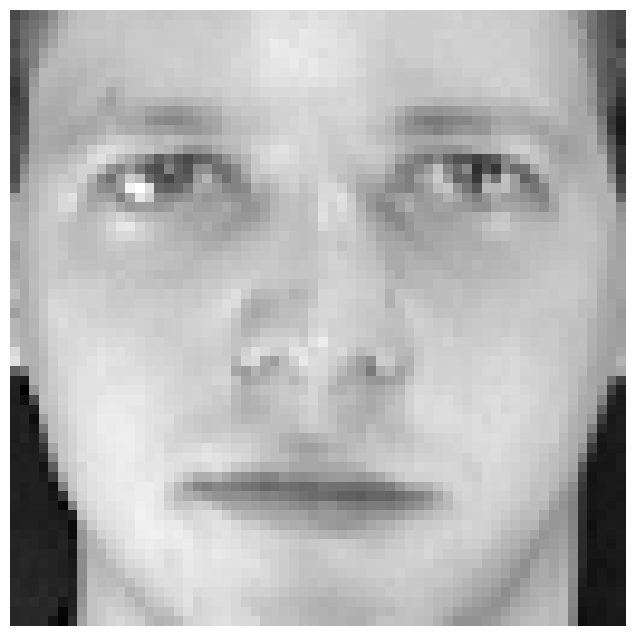

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(x[0].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.show()

### Logistic Regression

In [17]:
print("Logistic Regression (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LogisticRegression(max_iter=1000))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Logistic Regression (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, LogisticRegression(max_iter=1000))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Logistic Regression (OvO):


/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00         3
          18       1.00    

/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/pytho

### SVM

In [18]:
print("SVM (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, SVC())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("SVM (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, SVC())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

SVM (OvO):


/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      0.67      0.80         3
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         5
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00    

### Decision Tree

In [19]:
print("Decision Tree (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, DecisionTreeClassifier())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Decision Tree (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, DecisionTreeClassifier())
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Decision Tree (OvO):


/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         1
          16       1.00      0.33      0.50         3
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         3
          20       0.80    

/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/pytho

### Accuracy, Precision and Recall of Regular Classification Algorithms

| Classifier | Approach | Accuracy | Precision | Recall |
|------------|----------|----------|-----------|--------|
| LR         | OvO      | 0.875    | 0.8906250000000001 | 0.875  |
| LR         | OvR      | 0.9375   | 0.9388020833333333 | 0.9375 |
| SVM        | OvO      | 0.84375  | 0.8208333333333334 | 0.84375 |
| SVM        | OvR      | 0.953125 | 0.96875            | 0.953125 |
| Decision Tree         | OvO      | 0.75     | 0.8182291666666667 | 0.75   |
| Decision Tree         | OvR      | 0.421875 | 0.4321875          | 0.421875 |

Similar to Q1, SVM gives the best results, than LR and worst is Decision Tree. Differently, the OvR approach generally gave better results here except for the Decision Tree.


## Ensemble Classification Algorithms

### Random Forest

In [20]:
print("Random Forest (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, RandomForestClassifier(n_estimators=10))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Random Forest (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, RandomForestClassifier(n_estimators=10))
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Random Forest (OvO):


/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
          12       0.29      1.00      0.44         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         5
          18       1.00      1.00      1.00         2
          19       1.00      0.67      0.80         3
          20       1.00    

/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

### AdaBoost

In [34]:
print("AdaBoost (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000)),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("AdaBoost (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsRestClassifier, AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000)),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

AdaBoost (OvO):


/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       1.00    

/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bora/anaconda3/lib/python3.11/si

### XGBoost

In [6]:
print("XGBoost:")
report, accuracy, precision, recall = experimentXG(x_train, y_train,10)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

XGBoost:


XGBoostError: [22:48:53] /Users/runner/work/xgboost/xgboost/src/objective/multiclass_obj.cu:123: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000286fe4994 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000002871b07b0 xgboost::obj::SoftmaxMultiClassObj::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float>>*) + 844
  [bt] (2) 3   libxgboost.dylib                    0x000000028712c6bc xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 652
  [bt] (3) 4   libxgboost.dylib                    0x0000000287004ea4 XGBoosterUpdateOneIter + 144
  [bt] (4) 5   libffi.8.dylib                      0x00000001019e004c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x00000001019dd834 ffi_call_int + 1404
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x00000001019c0150 _ctypes_callproc + 752
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x00000001019ba4b4 PyCFuncPtr_call + 228
  [bt] (8) 9   python3.11                          0x0000000100b09034 _PyEval_EvalFrameDefault + 197300



### LightGBM

In [ ]:
print("LightGBM (OvO):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LGBMClassifier(num_leaves=5, n_estimators=20),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("LightGBM (OvR):")
report, accuracy, precision, recall = experiment(x_train, y_train, OneVsOneClassifier, LGBMClassifier(num_leaves=5, n_estimators=20),test=0.20)
print(report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Accuracy, Precision and Recall of Regular Classification Algorithms



## Q3

In [14]:
url = "https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr,tas_timeseries_annual_1901-2022_mean_historical_cru_ts4.07_mean/ESP,REU,MCO,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,EGY,LBY,TUN,DZA,MAR,MLT,CYP?_format=json"
response = requests.get(url)
    
data_str = response.text 
data_json = json.loads(data_str)  
data_json

{'metadata': {'apiVersion': 'v1', 'status': 'success', 'messages': []},
 'data': {'pr': {'ALB': {'1901-07': 1376,
    '1902-07': 1245.22,
    '1903-07': 1083.29,
    '1904-07': 1131.07,
    '1905-07': 1088.97,
    '1906-07': 1282.16,
    '1907-07': 1126.73,
    '1908-07': 994.38,
    '1909-07': 1311.95,
    '1910-07': 1241.06,
    '1911-07': 1027.52,
    '1912-07': 1129.39,
    '1913-07': 1072.54,
    '1914-07': 1229.87,
    '1915-07': 1633.71,
    '1916-07': 1232.97,
    '1917-07': 1033.8,
    '1918-07': 1098.48,
    '1919-07': 1399.6,
    '1920-07': 1016.57,
    '1921-07': 930.91,
    '1922-07': 1140.96,
    '1923-07': 1372.28,
    '1924-07': 1120.56,
    '1925-07': 1088.84,
    '1926-07': 1080.05,
    '1927-07': 1231.77,
    '1928-07': 1214.31,
    '1929-07': 1124.31,
    '1930-07': 1197.1,
    '1931-07': 1258.93,
    '1932-07': 957.49,
    '1933-07': 1243.26,
    '1934-07': 1144.37,
    '1935-07': 1230.11,
    '1936-07': 1274.83,
    '1937-07': 1546.76,
    '1938-07': 1099.41,
    

## Q4

In [4]:
commodities = {'SI=F': 'Silver', 'HG=F': 'Copper', 'PL=F': 'Platinum', 'GC=F': 'Gold', 'PA=F': 'Palladium'} 
finance = yf.download(list(commodities))
finance

[*********************100%%**********************]  5 of 5 completed


Price         Adj Close                                              \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F   
Date                                                                  
2000-01-04          NaN     NaN   441.899994  429.700012        NaN   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN   
...                 ...     ...          ...         ...        ...   
2024-04-17  2371.699951  4.3425  1029.000000  942.700012  28.346001   
2024-04-18  2382.300049  4.4405  1037.599976  945.299988  28.329000   
2024-04-19  2398.399902  4.5020  1025.500000  934.099976  28.808001   
2024-04-22  2332.199951  4.5005  1014.700012  922.200012  27.212999   
2024-04-23  2342.500000  4.4350  1030.500000  922.200012  27.405001   

Price             Close                                              ...  \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F  ...   
Date                                                                 ...   
2000-01-04          NaN     NaN   441.899994  429.700012        NaN  ...   
2000-01-05          NaN     NaN   438.100006  419.899994        NaN  ...   
2000-01-06          NaN     NaN   435.299988  412.000000        NaN  ...   
2000-01-07          NaN     NaN   443.899994  414.000000        NaN  ...   
2000-01-10          NaN     NaN   451.950012  415.000000        NaN  ...   
...                 ...     ...          ...         ...        ...  ...   
2024-04-17  2371.699951  4.3425  1029.000000  942.700012  28.346001  ...   
2024-04-18  2382.300049  4.4405  1037.599976  945.299988  28.329000  ...   
2024-04-19  2398.399902  4.5020  1025.500000  934.099976  28.808001  ...   
2024-04-22  2332.199951  4.5005  1014.700012  922.200012  27.212999  ...   
2024-04-23  2342.500000  4.4350  1030.500000  922.200012  27.405001  ...   

Price              Open                                                Volume  \
Ticker             GC=F    HG=F         PA=F        PL=F       SI=F      GC=F   
Date                                                                            
2000-01-04          NaN     NaN   445.000000  428.000000        NaN       NaN   
2000-01-05          NaN     NaN   436.000000  428.000000        NaN       NaN   
2000-01-06          NaN     NaN   434.500000  415.000000        NaN       NaN   
2000-01-07          NaN     NaN   437.000000  408.000000        NaN       NaN   
2000-01-10          NaN     NaN   443.899994  414.000000        NaN       NaN   
...                 ...     ...          ...         ...        ...       ...   
2024-04-17  2384.199951  4.3715  1029.000000  942.700012  28.510000      37.0   
2024-04-18  2368.399902  4.4150  1037.599976  942.299988  28.329000     128.0   
2024-04-19  2379.300049  4.4425  1025.500000  944.099976  28.504999     160.0   
2024-04-22  2383.300049  4.4785  1014.700012  922.200012  27.212999     160.0   
2024-04-23  2342.300049  4.4830  1016.500000  932.000000  27.200001  248250.0   

Price                                           
Ticker         HG=F    PA=F     PL=F      SI=F  
Date                                            
2000-01-04      NaN   177.0    632.0       NaN  
2000-01-05      NaN   319.0    571.0       NaN  
2000-01-06      NaN   180.0    494.0       NaN  
2000-01-07      NaN   102.0    130.0       NaN  
2000-01-10      NaN   143.0     24.0       NaN  
...             ...     ...      ...       ...  
2024-04-17    234.0     0.0      2.0       9.0  
2024-04-18    295.0     0.0     24.0       0.0  
2024-04-19    248.0     0.0      8.0      15.0  
2024-04-22    248.0     0.0      8.0      15.0  
2024-04-23  96121.0  4216.0  34087.0  101867.0  

[6107 rows x 30 columns]

In [5]:
finance.rename(columns=commodities, inplace=True)
finance.interpolate(inplace=True)
finance.bfill(inplace=True)
finance

Price         Adj Close                                              \
Ticker             Gold  Copper    Palladium    Platinum     Silver   
Date                                                                  
2000-01-04   273.899994  0.8850   441.899994  429.700012   4.930000   
2000-01-05   273.899994  0.8850   438.100006  419.899994   4.930000   
2000-01-06   273.899994  0.8850   435.299988  412.000000   4.930000   
2000-01-07   273.899994  0.8850   443.899994  414.000000   4.930000   
2000-01-10   273.899994  0.8850   451.950012  415.000000   4.930000   
...                 ...     ...          ...         ...        ...   
2024-04-17  2371.699951  4.3425  1029.000000  942.700012  28.346001   
2024-04-18  2382.300049  4.4405  1037.599976  945.299988  28.329000   
2024-04-19  2398.399902  4.5020  1025.500000  934.099976  28.808001   
2024-04-22  2332.199951  4.5005  1014.700012  922.200012  27.212999   
2024-04-23  2342.500000  4.4350  1030.500000  922.200012  27.405001   

Price             Close                                              ...  \
Ticker             Gold  Copper    Palladium    Platinum     Silver  ...   
Date                                                                 ...   
2000-01-04   273.899994  0.8850   441.899994  429.700012   4.930000  ...   
2000-01-05   273.899994  0.8850   438.100006  419.899994   4.930000  ...   
2000-01-06   273.899994  0.8850   435.299988  412.000000   4.930000  ...   
2000-01-07   273.899994  0.8850   443.899994  414.000000   4.930000  ...   
2000-01-10   273.899994  0.8850   451.950012  415.000000   4.930000  ...   
...                 ...     ...          ...         ...        ...  ...   
2024-04-17  2371.699951  4.3425  1029.000000  942.700012  28.346001  ...   
2024-04-18  2382.300049  4.4405  1037.599976  945.299988  28.329000  ...   
2024-04-19  2398.399902  4.5020  1025.500000  934.099976  28.808001  ...   
2024-04-22  2332.199951  4.5005  1014.700012  922.200012  27.212999  ...   
2024-04-23  2342.500000  4.4350  1030.500000  922.200012  27.405001  ...   

Price              Open                                                Volume  \
Ticker             Gold  Copper    Palladium    Platinum     Silver      Gold   
Date                                                                            
2000-01-04   273.899994  0.8790   445.000000  428.000000   4.950000       0.0   
2000-01-05   273.899994  0.8790   436.000000  428.000000   4.950000       0.0   
2000-01-06   273.899994  0.8790   434.500000  415.000000   4.950000       0.0   
2000-01-07   273.899994  0.8790   437.000000  408.000000   4.950000       0.0   
2000-01-10   273.899994  0.8790   443.899994  414.000000   4.950000       0.0   
...                 ...     ...          ...         ...        ...       ...   
2024-04-17  2384.199951  4.3715  1029.000000  942.700012  28.510000      37.0   
2024-04-18  2368.399902  4.4150  1037.599976  942.299988  28.329000     128.0   
2024-04-19  2379.300049  4.4425  1025.500000  944.099976  28.504999     160.0   
2024-04-22  2383.300049  4.4785  1014.700012  922.200012  27.212999     160.0   
2024-04-23  2342.300049  4.4830  1016.500000  932.000000  27.200001  248250.0   

Price                                             
Ticker       Copper Palladium Platinum    Silver  
Date                                              
2000-01-04   2886.0     177.0    632.0    2319.0  
2000-01-05   2886.0     319.0    571.0    2319.0  
2000-01-06   2886.0     180.0    494.0    2319.0  
2000-01-07   2886.0     102.0    130.0    2319.0  
2000-01-10   2886.0     143.0     24.0    2319.0  
...             ...       ...      ...       ...  
2024-04-17    234.0       0.0      2.0       9.0  
2024-04-18    295.0       0.0     24.0       0.0  
2024-04-19    248.0       0.0      8.0      15.0  
2024-04-22    248.0       0.0      8.0      15.0  
2024-04-23  96121.0    4216.0  34087.0  101867.0  

[6107 rows x 30 columns]

In [6]:
finance = finance['Adj Close']
finance

Ticker,Gold,Copper,Palladium,Platinum,Silver
Date,,,,,
2000-01-04,273.899994,0.8850,441.899994,429.700012,4.930000
2000-01-05,273.899994,0.8850,438.100006,419.899994,4.930000
2000-01-06,273.899994,0.8850,435.299988,412.000000,4.930000
2000-01-07,273.899994,0.8850,443.899994,414.000000,4.930000
2000-01-10,273.899994,0.8850,451.950012,415.000000,4.930000
...,...,...,...,...,...
2024-04-17,2371.699951,4.3425,1029.000000,942.700012,28.346001
2024-04-18,2382.300049,4.4405,1037.599976,945.299988,28.329000
2024-04-19,2398.399902,4.5020,1025.500000,934.099976,28.808001


In [21]:
def regression_model(finance_data, model_type, ticker_name):
    
    ticker_data = finance_data[[ticker_name]]
    ticker_data.reset_index(inplace=True)
    
    ticker_data['Date'] = pd.to_numeric(pd.to_datetime(ticker_data['Date']))
    
    X = ticker_data[['Date']]
    y = ticker_data[ticker_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    
    if model_type == 'OLS':
        model = LinearRegression()
    elif model_type == 'DecisionTree':
        model = DecisionTreeRegressor()
    elif model_type == 'SVC':
        model = SVC()
    elif model_type == 'AdaBoost':
        model = AdaBoostRegressor()
    elif model_type == 'LightGBM':
        model = LGBMRegressor()
    elif model_type == 'XGBoost':
        model = XGBRegressor()
    else:
        return "Invalid model type"
    
   
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f'{model_type} Regression for {ticker_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    
    
    return model

Example visualization for clarity.

/var/folders/sp/81b8fkpj25j58b0z6jwjhgrm0000gn/T/ipykernel_90103/3066202546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Date'] = pd.to_numeric(pd.to_datetime(ticker_data['Date']))


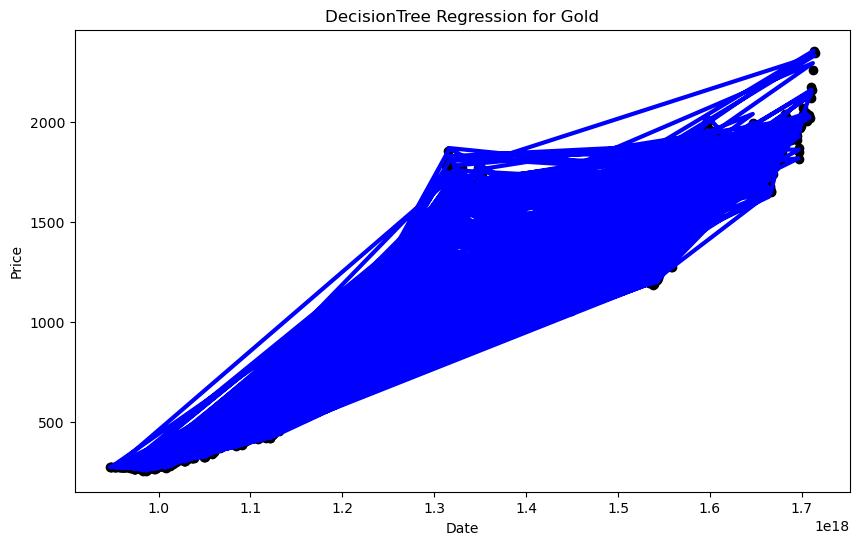

In [27]:
model = regression_model(finance, 'DecisionTree', 'Gold')

In [25]:
def evaluate_model_combinations(finance_data):
    tickers = finance_data.columns.tolist()
    model_types = ['OLS', 'DecisionTree', 'SVR', 'AdaBoost', 'XGBoost','LightGBM']
    
    best_model = None
    best_mse = float('inf')
    best_ticker = None
    best_model_type = None
    
    for ticker in tickers:
        for model_type in model_types:
            model = regression_model(finance_data, model_type, ticker)
            X = finance_data[['Date']]
            y = finance_data[ticker]
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            print(f'Ticker: {ticker}, Model: {model_type}, MSE: {mse}')
            
            if mse < best_mse:
                best_mse = mse
                best_model = model
                best_ticker = ticker
                best_model_type = model_type
    
    print(f'Best Model: {best_model_type} for Ticker: {best_ticker}, MSE: {best_mse}')


/var/folders/sp/81b8fkpj25j58b0z6jwjhgrm0000gn/T/ipykernel_90103/3066202546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['Date'] = pd.to_numeric(pd.to_datetime(ticker_data['Date']))


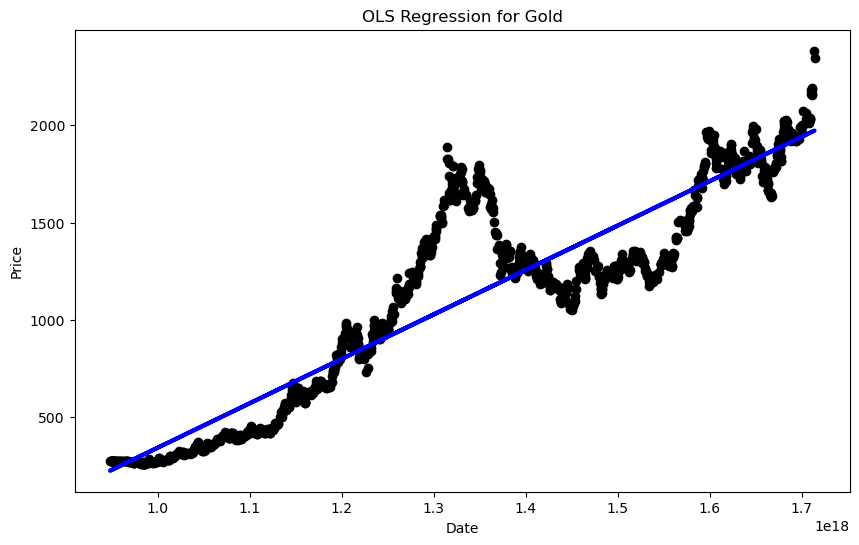

KeyError: "None of [Index(['Date'], dtype='object', name='Ticker')] are in the [columns]"

In [26]:
evaluate_model_combinations(finance)